In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
noise_list = [0,0.05,0.25,0.55,1]
MSE_train_list = []
RMSE_train_list = []
MAE_train_list = []
R2_train_list = []

MSE_test_list = []
RMSE_test_list = []
MAE_test_list = []
R2_test_list = []

In [3]:
# 读取CSV文件，不指定数据类型，让pandas自动识别
data = pd.read_csv('preprocess2.csv')

# 处理缺失值（填充或删除含有缺失值的行）
data = data.dropna()
data = data.tail(10000)

# 将分类变量转化为虚拟变量（独热编码），排除目标变量
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 定义需要预测的目标变量
target = '紫外线（指数）'
results = {}

# 设置交叉验证的折数和参数范围
kf = KFold(n_splits=5, shuffle=True, random_state=1)
neighbors = list(range(1, 31))  # 邻居数从1到30


# 将当前目标变量y，其余作为特征X
X = data.drop(columns=[target])
y = data[target]

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化处理特征
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [4]:
# 存储不同n_neighbors的分数
scores = []

# 使用最佳n_neighbors训练模型
knn_regressor = KNeighborsRegressor(n_neighbors=1)
knn_regressor.fit(X_train, y_train)

# 进行预测
y_train_pred = knn_regressor.predict(X_train)
y_pred = knn_regressor.predict(X_test)

# 计算训练集和测试集的MSE、RMSE、MAE和R²分数
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = knn_regressor.score(X_train, y_train)

test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = knn_regressor.score(X_test, y_test)

results = {
    '训练集MSE': train_mse,
    '训练集RMSE': train_rmse,
    '训练集MAE': train_mae,
    '训练集R²分数': train_r2,
    '测试集MSE': test_mse,
    '测试集RMSE': test_rmse,
    '测试集MAE': test_mae,
    '测试集R²分数': test_r2
}

# MSE_train_list.append((0,train_mse))
# RMSE_train_list.append((0,train_rmse))
# MAE_train_list.append((0,train_mae))
# R2_train_list.append((0,train_r2))

# MSE_test_list.append((0,test_mse))
# RMSE_test_list.append((0,test_rmse))
# MAE_test_list.append((0,test_mae))
# R2_test_list.append((0,test_r2))

# 打印结果
print(f"\n{target}的评价指标:")
for metric, value in results.items():
    print(f"{metric}: {value:.3f}")

# 检查数据是否有异常值
print("\n数据描述统计:")
print(data.describe())

# 检查训练和测试集的分布
print("\n训练集和测试集的分布差异:")
print("训练集的形状:", X_train.shape)
print("测试集的形状:", X_test.shape)


紫外线（指数）的评价指标:
训练集MSE: 0.227
训练集RMSE: 0.476
训练集MAE: 0.052
训练集R²分数: 0.972
测试集MSE: 1.643
测试集RMSE: 1.282
测试集MAE: 0.484
测试集R²分数: 0.793

数据描述统计:
               区域名称         阵风（级）       能见度（公里）     最大湿度（百分比）            风向  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       4.502700      4.441900     15.528300     86.763500      3.952900   
std        1.708943      0.868504      3.702914      7.039071      2.430776   
min        2.000000      3.000000      5.000000     35.000000      1.000000   
25%        3.000000      4.000000     12.000000     85.000000      1.000000   
50%        5.000000      4.000000     15.000000     85.000000      5.000000   
75%        6.000000      5.000000     20.000000     90.000000      6.000000   
max        7.000000      9.000000     25.000000    100.000000      8.000000   

            紫外线（指数）     最低能见度（公里）         浪高(米)       降雨量（毫米）          阵风风向  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.

In [5]:
# # 存储不同n_neighbors的分数
# scores = []

# # 使用马氏距离矩阵
# VI = np.linalg.inv(np.cov(X_train, rowvar=False))

# # 对每个邻居数进行交叉验证
# for n in neighbors:
#     knn_regressor = KNeighborsRegressor(n_neighbors=n, metric='mahalanobis', metric_params={'V': VI})
#     scores.append(cross_val_score(knn_regressor, X_train, y_train, cv=kf, scoring='neg_mean_squared_error').mean())

# # 找到最佳分数和对应的n_neighbors
# best_score_index = scores.index(max(scores))
# best_n_neighbors = neighbors[best_score_index]
# best_score = max(scores) * -1  # 因为分数是负的MSE

# # 使用最佳n_neighbors训练模型
# best_knn_regressor = KNeighborsRegressor(n_neighbors=best_n_neighbors, metric='mahalanobis', metric_params={'V': VI})
# best_knn_regressor.fit(X_train, y_train)

# # 进行预测
# y_train_pred = best_knn_regressor.predict(X_train)
# y_pred = best_knn_regressor.predict(X_test)

# # 计算训练集和测试集的MSE、RMSE、MAE和R²分数
# train_mse = mean_squared_error(y_train, y_train_pred)
# train_rmse = np.sqrt(train_mse)
# train_mae = mean_absolute_error(y_train, y_train_pred)
# train_r2 = best_knn_regressor.score(X_train, y_train)

# test_mse = mean_squared_error(y_test, y_pred)
# test_rmse = np.sqrt(test_mse)
# test_mae = mean_absolute_error(y_test, y_pred)
# test_r2 = best_knn_regressor.score(X_test, y_test)

# results = {
#     '最佳n_neighbors': best_n_neighbors,
#     '最佳MSE': best_score,
#     '训练集MSE': train_mse,
#     '训练集RMSE': train_rmse,
#     '训练集MAE': train_mae,
#     '训练集R²分数': train_r2,
#     '测试集MSE': test_mse,
#     '测试集RMSE': test_rmse,
#     '测试集MAE': test_mae,
#     '测试集R²分数': test_r2
# }

# # 打印结果
# print(f"\n{target}的评价指标:")
# for metric, value in results.items():
#     print(f"{metric}: {value:.3f}")

# # 检查数据是否有异常值
# print("\n数据描述统计:")
# print(data.describe())

# # 检查训练和测试集的分布
# print("\n训练集和测试集的分布差异:")
# print("训练集的形状:", X_train.shape)
# print("测试集的形状:", X_test.shape)

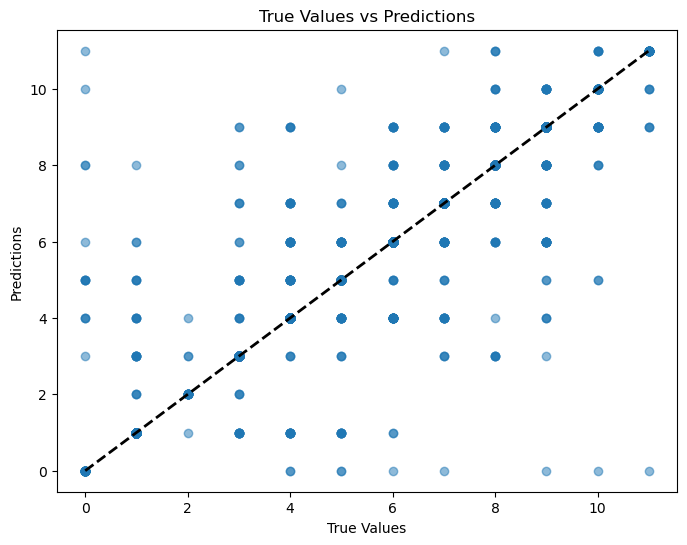

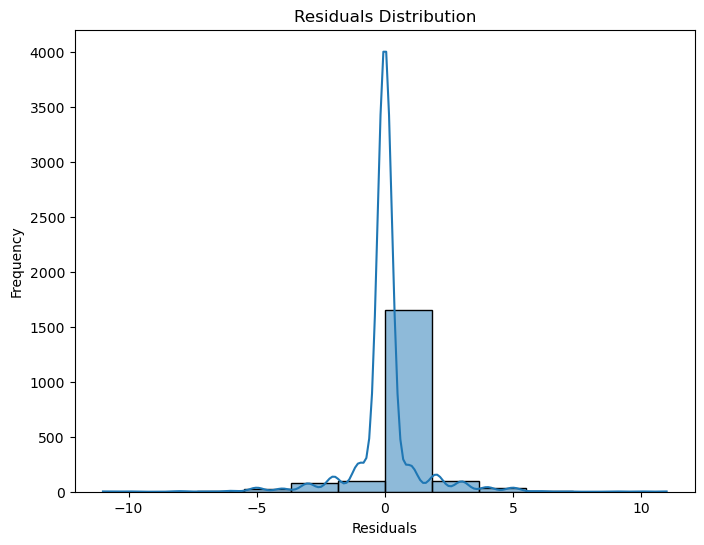

In [6]:
# 可视化回归残差
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

In [7]:
# 假设我们添加高斯噪声
for noise_level in noise_list:  # 噪声水平，根据数据范围和需求调整

    # 向训练数据添加噪声
    X_train_noisy = X_train + noise_level * np.random.normal(size=X_train.shape)

    # 确保噪声数据在原数据的范围内，例如通过clip方法
    X_train_noisy = np.clip(X_train_noisy, X_train.min(), X_train.max())

    # 存储不同n_neighbors的分数
    scores = []

    # # 对每个邻居数进行交叉验证
    # for n in neighbors:
    #     knn_regressor = KNeighborsRegressor(n_neighbors=n)
    #     scores.append(cross_val_score(knn_regressor, X_train_noisy, y_train, cv=kf, scoring='neg_mean_squared_error').mean())

    # # 找到最佳分数和对应的n_neighbors
    # best_score_index = scores.index(max(scores))
    # best_n_neighbors = neighbors[best_score_index]
    # best_score = max(scores) * -1  # 因为分数是负的MSE

    # 使用最佳n_neighbors重新训练模型
    best_knn_regressor = KNeighborsRegressor()
    best_knn_regressor.fit(X_train_noisy, y_train)


    # 在原始测试集上进行预测
    y_pred_perturbed_test = best_knn_regressor.predict(X_test)
    y_pred_perturbed_train = best_knn_regressor.predict(X_train_noisy)

    # 计算扰动后的评估指标
    test_mse_perturbed = mean_squared_error(y_test, y_pred_perturbed_test)
    test_rmse_perturbed = np.sqrt(test_mse_perturbed)
    test_mae_perturbed = mean_absolute_error(y_test, y_pred_perturbed_test)
    test_r2_perturbed = r2_score(y_test, y_pred_perturbed_test)

    train_mse_perturbed = mean_squared_error(y_train, y_pred_perturbed_train)
    train_rmse_perturbed = np.sqrt(train_mse_perturbed)
    train_mae_perturbed = mean_absolute_error(y_train, y_pred_perturbed_train)
    train_r2_perturbed = r2_score(y_train, y_pred_perturbed_train)


    # 打印结果
    results = {
        # '最佳n_neighbors': best_n_neighbors,
        '训练集扰动后的MSE': train_mse_perturbed,
        '训练集扰动后的RMSE': train_rmse_perturbed,
        '训练集扰动后的MAE': train_mae_perturbed,
        '训练集扰动后的R²分数': train_r2_perturbed,
        '测试集扰动后的MSE': test_mse_perturbed,
        '测试集扰动后的RMSE': test_rmse_perturbed,
        '测试集扰动后的MAE': test_mae_perturbed,
        '测试集扰动后的R²分数': test_r2_perturbed
    }

    MSE_train_list.append((noise_level,train_mse_perturbed))
    RMSE_train_list.append((noise_level,train_rmse_perturbed))
    MAE_train_list.append((noise_level,train_mae_perturbed))
    R2_train_list.append((noise_level,train_r2_perturbed))

    MSE_test_list.append((noise_level,test_mse_perturbed))
    RMSE_test_list.append((noise_level,test_rmse_perturbed))
    MAE_test_list.append((noise_level,test_mae_perturbed))
    R2_test_list.append((noise_level,test_r2_perturbed))

    print(f"\n{target}的评价指标:")
    for metric, value in results.items():
        print(f"{metric}: {value:.3f}")


紫外线（指数）的评价指标:
训练集扰动后的MSE: 1.053
训练集扰动后的RMSE: 1.026
训练集扰动后的MAE: 0.590
训练集扰动后的R²分数: 0.869
测试集扰动后的MSE: 1.618
测试集扰动后的RMSE: 1.272
测试集扰动后的MAE: 0.777
测试集扰动后的R²分数: 0.797

紫外线（指数）的评价指标:
训练集扰动后的MSE: 1.078
训练集扰动后的RMSE: 1.038
训练集扰动后的MAE: 0.606
训练集扰动后的R²分数: 0.866
测试集扰动后的MSE: 1.589
测试集扰动后的RMSE: 1.261
测试集扰动后的MAE: 0.782
测试集扰动后的R²分数: 0.800

紫外线（指数）的评价指标:
训练集扰动后的MSE: 1.514
训练集扰动后的RMSE: 1.230
训练集扰动后的MAE: 0.807
训练集扰动后的R²分数: 0.812
测试集扰动后的MSE: 1.862
测试集扰动后的RMSE: 1.365
测试集扰动后的MAE: 0.910
测试集扰动后的R²分数: 0.766

紫外线（指数）的评价指标:
训练集扰动后的MSE: 2.389
训练集扰动后的RMSE: 1.546
训练集扰动后的MAE: 1.129
训练集扰动后的R²分数: 0.704
测试集扰动后的MSE: 2.875
测试集扰动后的RMSE: 1.696
测试集扰动后的MAE: 1.199
测试集扰动后的R²分数: 0.639

紫外线（指数）的评价指标:
训练集扰动后的MSE: 3.443
训练集扰动后的RMSE: 1.855
训练集扰动后的MAE: 1.437
训练集扰动后的R²分数: 0.573
测试集扰动后的MSE: 3.897
测试集扰动后的RMSE: 1.974
测试集扰动后的MAE: 1.507
测试集扰动后的R²分数: 0.510


In [8]:
# # 存储不同n_neighbors的分数# 假设我们添加高斯噪声
# for noise_level in noise_list:  # 噪声水平，根据数据范围和需求调整

#     # 向训练数据添加噪声
#     X_train_noisy = X_train + noise_level * np.random.normal(size=X_train.shape)

#     # 确保噪声数据在原数据的范围内，例如通过clip方法
#     X_train_noisy = np.clip(X_train_noisy, X_train.min(), X_train.max())

#     # 存储不同n_neighbors的分数
#     scores = []

#     # 使用马氏距离矩阵
#     VI = np.linalg.inv(np.cov(X_train_noisy, rowvar=False))

#     # 对每个邻居数进行交叉验证
#     for n in neighbors:
#         knn_regressor = KNeighborsRegressor(n_neighbors=n, metric='mahalanobis', metric_params={'V': VI})
#         scores.append(cross_val_score(knn_regressor, X_train_noisy, y_train, cv=kf, scoring='neg_mean_squared_error').mean())

#     # 找到最佳分数和对应的n_neighbors
#     best_score_index = scores.index(max(scores))
#     best_n_neighbors = neighbors[best_score_index]
#     best_score = max(scores) * -1  # 因为分数是负的MSE

#     # 使用最佳n_neighbors训练模型
#     best_knn_regressor = KNeighborsRegressor(n_neighbors=best_n_neighbors, metric='mahalanobis', metric_params={'V': VI})
#     best_knn_regressor.fit(X_train_noisy, y_train)

#     # 在原始测试集上进行预测
#     y_pred_perturbed_test = best_knn_regressor.predict(X_test)
#     y_pred_perturbed_train = best_knn_regressor.predict(X_train_noisy)

#     # 计算扰动后的评估指标
#     test_mse_perturbed = mean_squared_error(y_test, y_pred_perturbed_test)
#     test_rmse_perturbed = np.sqrt(test_mse_perturbed)
#     test_mae_perturbed = mean_absolute_error(y_test, y_pred_perturbed_test)
#     test_r2_perturbed = r2_score(y_test, y_pred_perturbed_test)

#     train_mse_perturbed = mean_squared_error(y_train, y_pred_perturbed_train)
#     train_rmse_perturbed = np.sqrt(train_mse_perturbed)
#     train_mae_perturbed = mean_absolute_error(y_train, y_pred_perturbed_train)
#     train_r2_perturbed = r2_score(y_train, y_pred_perturbed_train)


#     # 打印结果
#     results = {
#         '最佳n_neighbors': best_n_neighbors,
#         '训练集扰动后的MSE': train_mse_perturbed,
#         '训练集扰动后的RMSE': train_rmse_perturbed,
#         '训练集扰动后的MAE': train_mae_perturbed,
#         '训练集扰动后的R²分数': train_r2_perturbed,
#         '测试集扰动后的MSE': test_mse_perturbed,
#         '测试集扰动后的RMSE': test_rmse_perturbed,
#         '测试集扰动后的MAE': test_mae_perturbed,
#         '测试集扰动后的R²分数': test_r2_perturbed
#     }

#     MSE_train_list.append((noise_level,train_mse_perturbed))
#     RMSE_train_list.append((noise_level,train_rmse_perturbed))
#     MAE_train_list.append((noise_level,train_mae_perturbed))
#     R2_train_list.append((noise_level,train_r2_perturbed))

#     MSE_test_list.append((noise_level,test_mse_perturbed))
#     RMSE_test_list.append((noise_level,test_rmse_perturbed))
#     MAE_test_list.append((noise_level,test_mae_perturbed))
#     R2_test_list.append((noise_level,test_r2_perturbed))

#     print(f"\n{target}的评价指标:")
#     for metric, value in results.items():
#         print(f"{metric}: {value:.3f}")


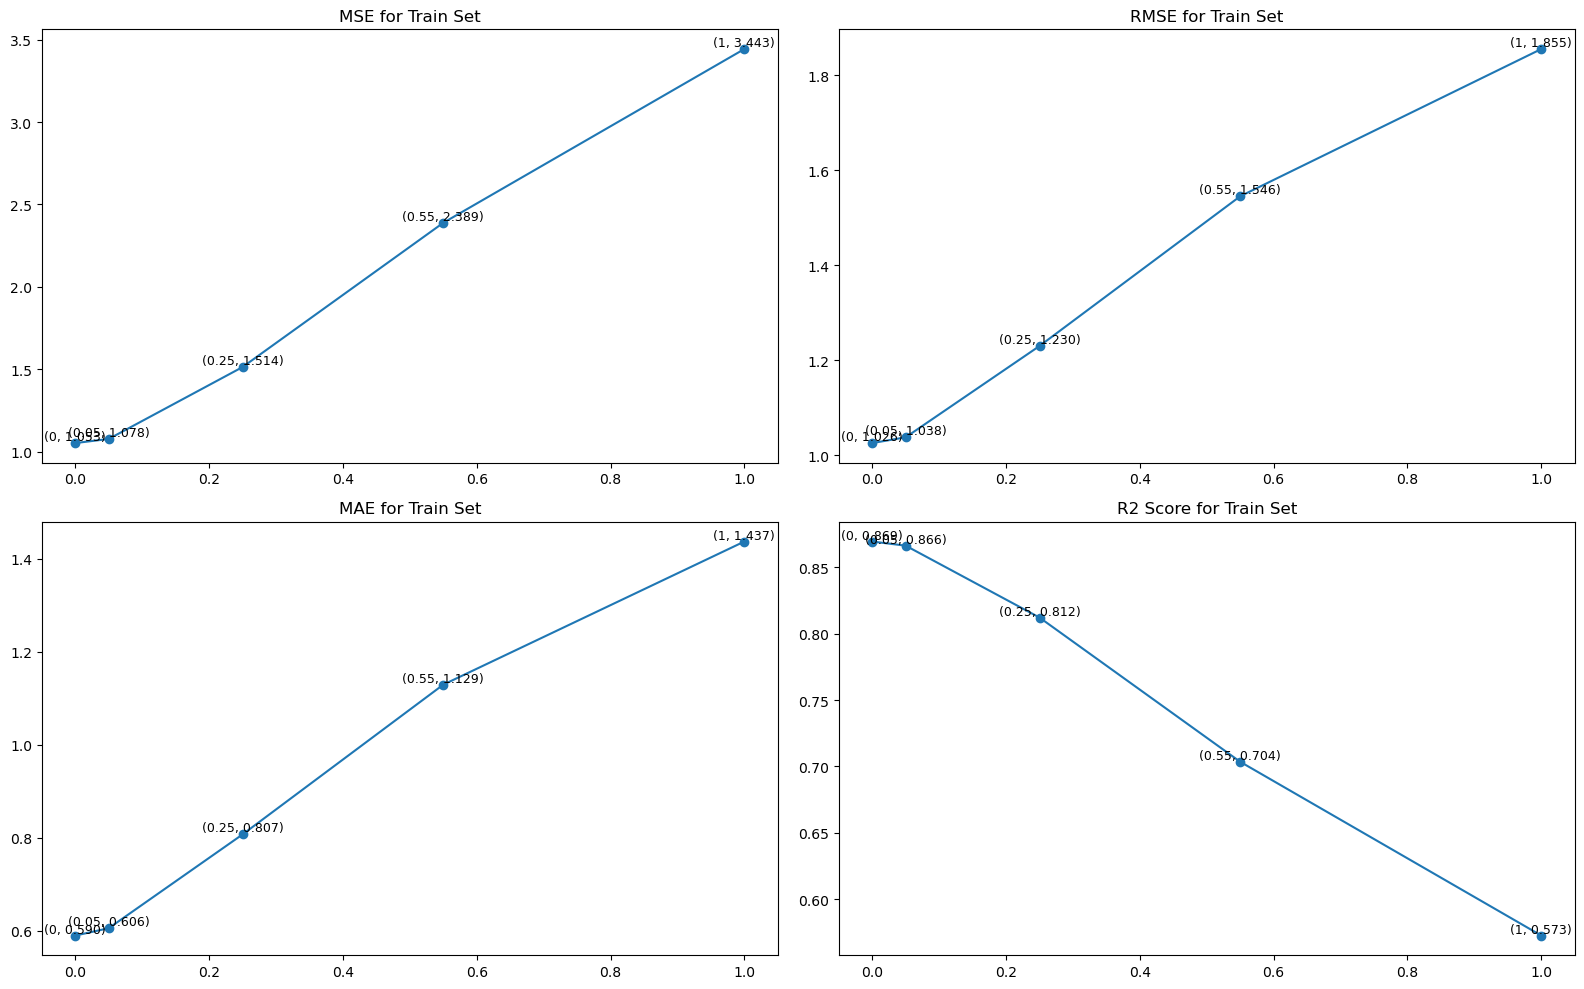

In [9]:
array1_list = [MSE_train_list, RMSE_train_list, MAE_train_list, R2_train_list]
titles1 = ['MSE for Train Set','RMSE for Train Set','MAE for Train Set','R2 Score for Train Set']
plt.figure(figsize=(16, 10))

for i,(list,title) in enumerate(zip(array1_list,titles1)):
    x = [tup[0] for tup in list]
    y = [tup[1] for tup in list]
    plt.plot(x, y, marker='o')
    for (xi, yi) in zip(x, y):
        plt.text(xi, yi, f'({xi}, {yi:.3f})', fontsize=9, ha='center', va='bottom')
    plt.title(title)
 
plt.show()

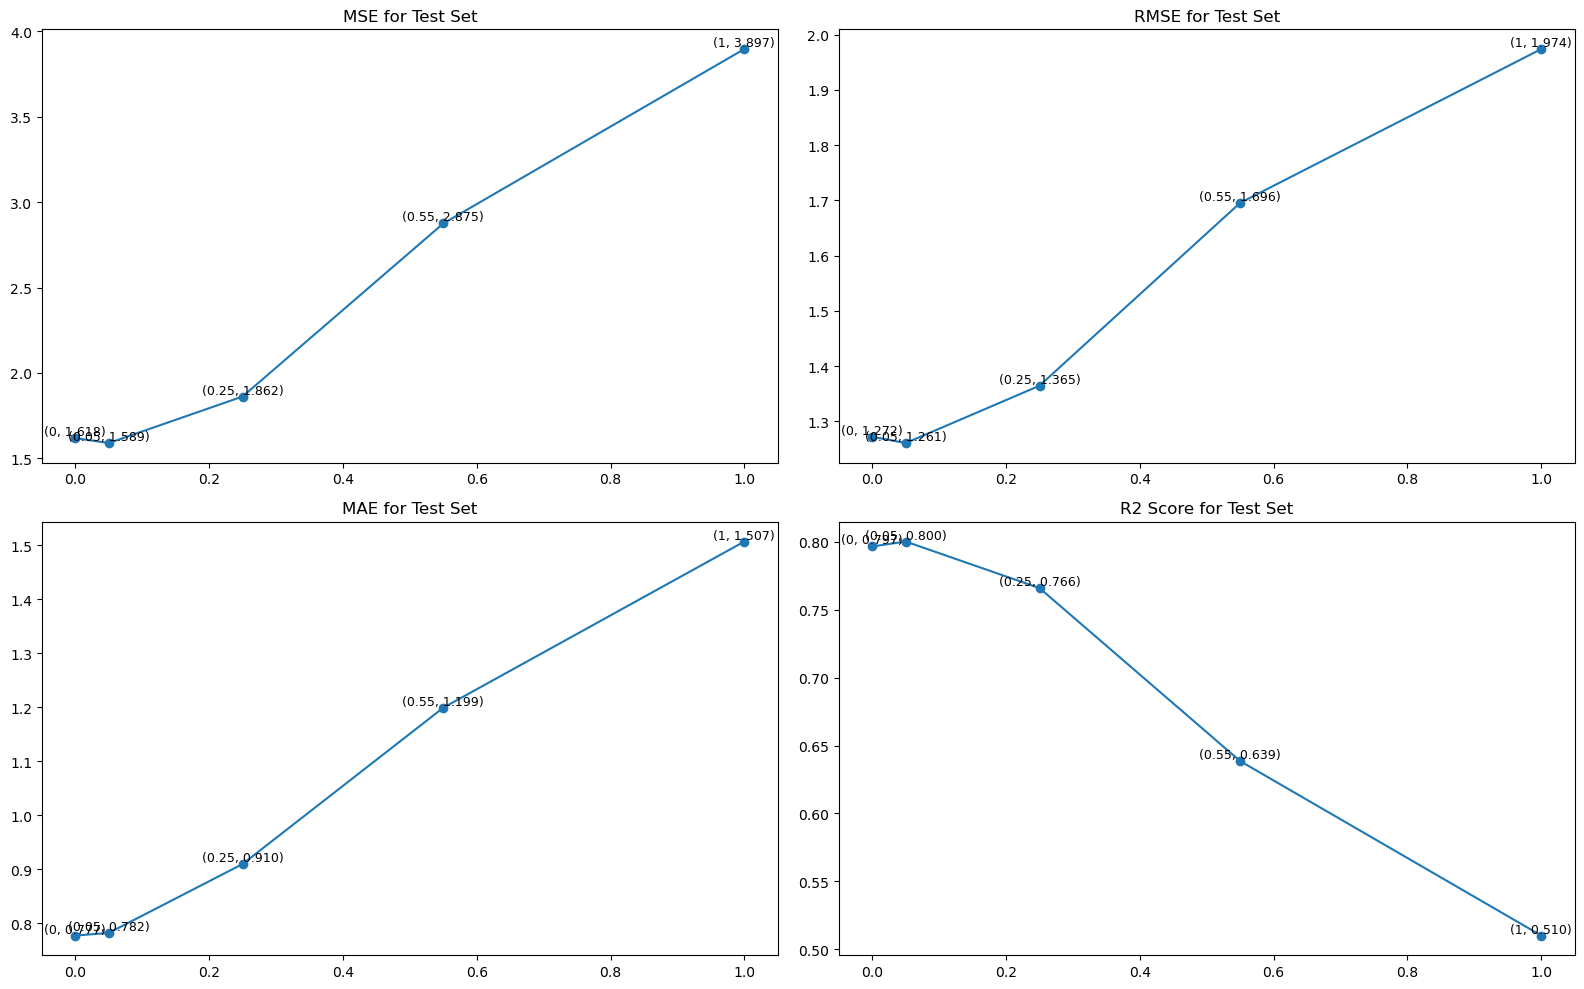

In [10]:
array2_list = [MSE_test_list, RMSE_test_list, MAE_test_list, R2_test_list]
titles2 = ['MSE for Test Set','RMSE for Test Set','MAE for Test Set','R2 Score for Test Set']
plt.figure(figsize=(16, 10))

for i,(list,title) in enumerate(zip(array2_list,titles2)):
    plt.subplot(2,2,i+1)
    x = [tup[0] for tup in list]
    y = [tup[1] for tup in list]
    plt.plot(x, y, marker='o')
    for (xi, yi) in zip(x, y):
        plt.text(xi, yi, f'({xi}, {yi:.3f})', fontsize=9, ha='center', va='bottom')
    plt.title(title)

plt.tight_layout()  
plt.show()